In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
%matplotlib inline

<class 'numpy.ndarray'> (960, 1280, 3)
max min 255 0


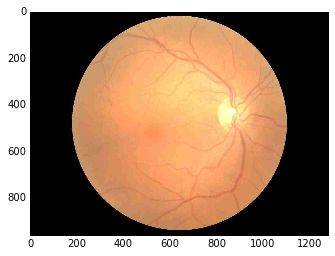

In [3]:
img=mpimg.imread(r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/1292_RE.jpg')
# display the image
imgplot = plt.imshow(img) 
print(type(img), img.shape)
print("max min", np.max(img), np.min(img))

In [7]:
# SHAPE OF THE IMAGE ARRAY
# In conv0 = tf.nn.relu((tf.nn.conv2d(data,layer0_weights,[1, 1, 1, 1],padding='SAME'))+layer0_biases)
# The data is on shape [batch, height, width, channels], height measured from top down, the width from the left to right

In [3]:
# TEXT LABELS
import glob
txtCount = len(glob.glob1(r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/',"*.txt"))
print(txtCount)

20758


In [43]:
import codecs
imgtext = {}
for i in range(txtCount+2):
    try:
        with codecs.open(r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/' + str(i) + '_T.txt', 
                 "r",encoding='utf-8', errors='ignore') as myfile:
            data=myfile.read().replace('\n', '')
            imgtext[str(i)] = data
    except (RuntimeError, TypeError, NameError, FileNotFoundError, UnicodeDecodeError) as e:
        print(e,'no text for',i ,)
        pass

[Errno 2] No such file or directory: '/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/0_T.txt' no text for 0
[Errno 2] No such file or directory: '/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/20759_T.txt' no text for 20759


In [6]:
import codecs
textarray = {}
for i in range(txtCount+2):
    try:
        with codecs.open(r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/' + str(i) + '_T.txt', 
                 "r",encoding='utf-8', errors='ignore') as myfile:
            data=myfile.read().replace('\n', '')
            textarray[str(i) + '_T.txt'] = data
    except:
        print('no text for',i ,)
        pass
    

('no text for', 0)
('no text for', 20759)


In [17]:
len(textarray)

20758

In [70]:
Unable, Severe, Mild, noDM = [], [], [], []
unlabeled = 0
for i in range(1,len(textarray)):
    text = textarray[i]
    if "Unable" in text or "unreadable" in text:
        Unable.append(i)
    elif "Severe" in text or "Significant retinopathy found" in text:
         Severe.append(i)
    elif "Mild" in text or "Minimal" in text:
         Mild.append(i)
    elif "No retinopathy found" in text:
         noDM.append(i)
    else:
         #print(i," ",text)
         unlabeled +=1
print(unlabeled)   

2245


In [71]:
print(len(Unable)) # 0

3517


In [72]:
print(len(Severe))# 1

766


In [73]:
print(len(Mild))# 2

1998


In [74]:
print(len(noDM))# 3

12231


In [7]:
import os.path
import re

image_text = []

path = r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/'

i=0
for key, value in textarray.items():
    image_num = str(re.search(r'\d+', key).group())
    if os.path.isfile(path+str(image_num)+'_LE.jpg'): 
        d={str(image_num)+'_LE.jpg':value}
        image_text.append(d)
        i+=1
    if os.path.isfile(path+str(image_num)+'_RE.jpg'): 
        d={str(image_num)+'_RE.jpg':value}
        image_text.append(d)
        i+=1


In [8]:
len(image_text)

41496

In [11]:
import pickle
pickle.dump(image_text,open("image_text2.p", "wb"))

In [84]:
import numpy as np
import os.path
import matplotlib.image as mpimg

labels = np.array([])
images = np.array([])
path = r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/'

def build_data(class_num, image_num, labels, data_num):
    if os.path.isfile(path+str(image_num)+'_LE.jpg'): 
        labels = np.append(labels,class_num) 
        data_num+=1
    if os.path.isfile(path+str(image_num)+'_RE.jpg'): 
        labels = np.append(labels,class_num) 
        data_num+=1
    return data_num, labels
        
data_num = 0

for i in range(1,len(textarray)):
    text = textarray[i]
    if "Unable" in text or "unreadable" in text:
        data_num, labels = build_data(0.,i,labels,data_num)
    elif "Severe" in text or "Significant retinopathy found" in text:
        data_num, labels = build_data(1.,i,labels,data_num)
    elif "Mild" in text or "Minimal" in text:
        data_num, labels = build_data(2.,i,labels,data_num)
    elif "No retinopathy found" in text:
        data_num, labels = build_data(3.,i,labels,data_num)
    else:
         unlabeled +=1
    print(data_num)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526
5

In [86]:
import pickle
pickle.dump(labels,open("labels.p", "wb"))

In [89]:
type(labels[0])

numpy.float64

In [90]:
num_examples = labels.shape[0]
num_classes = 4

label = np.zeros((num_examples,num_classes))
label[np.arange(num_examples),labels.astype(int)] = 1

In [91]:
pickle.dump(label,open("label.p", "wb"))

In [ ]:
import numpy as np
import os.path
import matplotlib.image as mpimg

labels = np.array([])
images = np.array([])
path = r'/Volumes/backup/VMC_retinopathy_data/SCVMC_Retina_DM_Carson/'

def build_data(class_num, image_num, image_array, data_num):
    if os.path.isfile(path+str(image_num)+'_LE.jpg'): 
        img=mpimg.imread(path+str(image_num)+'_LE.jpg')
        image_array = np.append(image_array, img)
        data_num+=1
    if os.path.isfile(path+str(image_num)+'_RE.jpg'): 
        img=mpimg.imread(path+str(image_num)+'_RE.jpg')
        image_array = np.append(image_array, img)
        data_num+=1
    return data_num, image_array
        
data_num = 0

for i in range(1,len(textarray)):
    text = textarray[i]
    if "Unable" in text or "unreadable" in text:
        data_num, images = build_data(0.,i,images,data_num)
    elif "Severe" in text or "Significant retinopathy found" in text:
        data_num, images = build_data(1.,i,images,data_num)
    elif "Mild" in text or "Minimal" in text:
        data_num, images = build_data(2.,i,images,data_num)
    elif "No retinopathy found" in text:
        data_num, images = build_data(3.,i,images,data_num)
    else:
         unlabeled +=1
    print(data_num)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526
5

In [11]:
import timeit

start_time_total = timeit.default_timer()

imgarray4000 = np.zeros((1000,450, 600, 3))

for i in range(38):
    start_time = timeit.default_timer()
    with h5py.File('cycle.h5', 'a') as FOB:
        FOB.create_dataset("imgarray"+str(i),data=imgarray4000,compression="gzip",compression_opts=9)
    end_time = timeit.default_timer()
    print(i,'ran for %.2fm' % ((end_time - start_time) / 60.))
    
end_time_total = timeit.default_timer()
print('total run time %.2fm' % ((end_time_total - start_time_total) / 60.))

dict

In [12]:
strings = ["Unable","unreadable","Severe","Significant retinopathy found","Mild","Minimal","No retinopathy found"]

i=1
for key, value in textarray.items():
    if not any(substr in value for substr in strings): 
        print(value)


    
    
    
   , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 
    
   @, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 
    
    
    
    
    
    
    
    
    
   D, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 
   j, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 
    
    
    
    
    
    
    
    
   , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 
    
    
    
    
    
    
    
    
    
  , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,

In [1]:
import pickle
import numpy as np
import h5py
import timeit

start_time_total = timeit.default_timer()

imgarray4000 = np.zeros((100,450, 600, 3))

for i in range(5):
    start_time = timeit.default_timer()
    with h5py.File('play.h5', 'a') as FOB:
        FOB.create_dataset("imgarray"+str(i),data=imgarray4000,compression="gzip",compression_opts=9)
    end_time = timeit.default_timer()
    print(i,'ran for %.2fm' % ((end_time - start_time) / 60.))
    
end_time_total = timeit.default_timer()
print('total run time %.2fm' % ((end_time_total - start_time_total) / 60.))

(0, 'ran for 0.09m')
(1, 'ran for 0.08m')
(2, 'ran for 0.08m')
(3, 'ran for 0.08m')
(4, 'ran for 0.08m')
total run time 0.41m


In [56]:
from scipy.misc import imresize

def jpg_resize_numpy(path):
    imgnp = mpimg.imread(path)
    height,_,_ = imgnp.shape
    if height > 450:
        imgnp = imresize(imgnp,(450,600,3))
    return imgnp

with h5py.File('play.h5', 'a') as FOB:
    img=jpg_resize_numpy(r'/Users/carsonlam/Desktop/VMC/145_LE.jpg')
    print(type(img),img.shape)
    FOB.get('imgarray1')[1] = img
    
# to re-assign you must set FOB.get('imgarray1')[1,1,1,1] = 1

(<type 'numpy.ndarray'>, (450, 600, 3))


(<type 'numpy.ndarray'>, dtype('float64'))
(<type 'numpy.ndarray'>, dtype('uint8'))


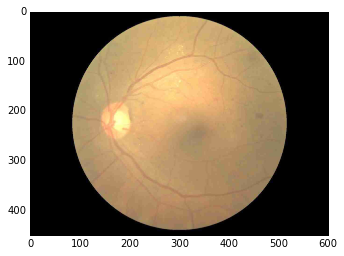

In [67]:
with h5py.File('play.h5', 'a') as FOB:
    img = FOB.get('imgarray1')[1]

imgplot = plt.imshow(img) 
print(type(img),img.dtype)
img = img.astype('uint8')
imgplot = plt.imshow(img)
print(type(img),img.dtype)

uint8


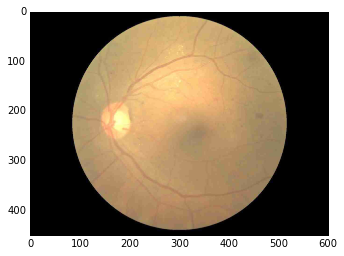

In [64]:
img2=jpg_resize_numpy(r'/Users/carsonlam/Desktop/VMC/145_LE.jpg')
imgplot = plt.imshow(img2)
print(img2.dtype)

In [69]:
import pickle
import numpy as np
import h5py

image_text = pickle.load(open("image_text2.p","rb"))
imagecount = len(image_text)
print('list size of image text',imagecount)

laset=np.zeros((1,4))
print(laset.shape)
print(np.array([1,0,0,0]).shape)
imset=[]

for pair in image_text:
    for key in pair:
        if "Unable" in pair[key] or "unreadable" in pair[key]:
            imset.append(key)
            laset = np.append(laset,np.expand_dims(np.array([1,0,0,0]),axis=0), axis=0)

        elif "Severe" in pair[key] or "Significant retinopathy found" in pair[key]:
            imset.append(key)
            laset = np.append(laset, np.expand_dims(np.array([0,1,0,0]),axis=0), axis=0)

        elif "Mild" in pair[key] or "Minimal" in pair[key]:
            imset.append(key)
            laset = np.append(laset, np.expand_dims(np.array([0,0,1,0]),axis=0), axis=0)

        elif "No retinopathy found" in pair[key]:
            imset.append(key)
            laset = np.append(laset, np.expand_dims(np.array([0,0,0,1]),axis=0), axis=0)

            
print(laset.shape,laset[0])
laset = laset[1:]
print("laset ",laset.shape,'example',laset[0])
print("imset ",len(imset))
            
with h5py.File('cycle.h5', 'a') as FOB:
    FOB.attrs.create('count',0)
    FOB.create_dataset("laset",data=laset,compression="gzip")
    FOB.create_dataset("imgnames",data=imset,compression="gzip")
            


('list size of image text', 41496)
(1, 4)
(4,)
((37020, 4), array([ 0.,  0.,  0.,  0.]))
('laset ', (37019, 4), 'example', array([ 0.,  0.,  0.,  1.]))
('imset ', 37019)
